In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df=pd.read_csv("HousingData.csv")
print("https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html for abbreviations")

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html for abbreviations


In [10]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [13]:
df.shape

(506, 14)

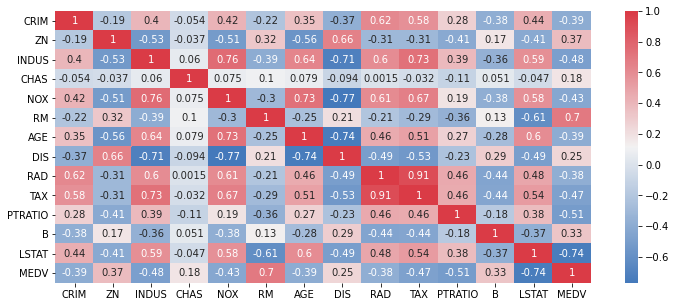

In [33]:
#plotting heatmap visually
corr_m=df.corr()
fig, ax = plt.subplots(figsize=(12,5))
                               
cmap = sb.diverging_palette(250,10,as_cmap=True)
sb.heatmap(corr_m,annot=True,cmap=cmap)
plt.show()

In [31]:
#seeing which factors affect crime rate in ascending values
corr_m['CRIM'].sort_values(ascending=True)
#index of accessibility to radial highways ->easy escape
#LSTAT - % lower status of the population ->no witness
#TAX - full-value property-tax rate per $10,000 ->tax
#blacks have less crime rate infact negative slope

MEDV      -0.391363
B         -0.381411
DIS       -0.374166
RM        -0.219150
ZN        -0.191178
CHAS      -0.054355
PTRATIO    0.281110
AGE        0.354342
INDUS      0.401863
NOX        0.417130
LSTAT      0.444943
TAX        0.580595
RAD        0.624765
CRIM       1.000000
Name: CRIM, dtype: float64

In [41]:
nearriver= (df["CHAS"]==1).sum()
print(nearriver)
awayriver= (df["CHAS"]==0).sum()
print(awayriver)

34
452


In [43]:
df['CHAS'].value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

In [50]:
(df['RM']>=7).sum()

64

In [52]:
df['8room']=(df['RM']>=8)

In [57]:
df1=df[df['RM']>=8]

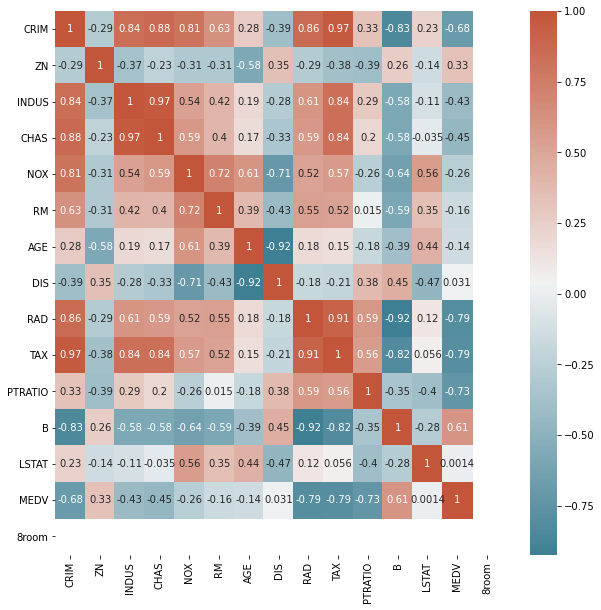

In [64]:
corr_m=df1.corr()
fig, ax = plt.subplots(figsize=(10,10))
cmap = sb.diverging_palette(220,20,as_cmap=True)
sb.heatmap(corr_m,annot=True,cmap=cmap)
plt.show()
#crime more in industrial area and near river